# Skin Cancer Classification - CNN

## Introduction

<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fnature21056/MediaObjects/41586_2017_Article_BFnature21056_Fig4_HTML.jpg" width=600>

### Problem

In [4]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Reshape, Input


In [49]:
labels=["Cancer","Non_Cancer"]
img_path = "Skin_Data/"

In [50]:
img_list = []
label_list = []
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)


In [51]:
os.listdir("Skin_Data/")

['Cancer', 'Non_Cancer']

In [52]:
img_list

['Skin_Data/Cancer/1007-1.jpg',
 'Skin_Data/Cancer/1010-01.JPG',
 'Skin_Data/Cancer/1012-2.JPG',
 'Skin_Data/Cancer/1031-1.jpg',
 'Skin_Data/Cancer/1051-3(94).jpg',
 'Skin_Data/Cancer/1051-3(95).jpg',
 'Skin_Data/Cancer/113-1.JPG',
 'Skin_Data/Cancer/1157-01.JPG',
 'Skin_Data/Cancer/120.2.JPG',
 'Skin_Data/Cancer/1239-2.JPG',
 'Skin_Data/Cancer/14-8.JPG',
 'Skin_Data/Cancer/1435-1.JPG',
 'Skin_Data/Cancer/1435-2.JPG',
 'Skin_Data/Cancer/1435-3.JPG',
 'Skin_Data/Cancer/1540-4.JPG',
 'Skin_Data/Cancer/1543.JPG',
 'Skin_Data/Cancer/1545.JPG',
 'Skin_Data/Cancer/156.JPG',
 'Skin_Data/Cancer/1563-03.jpg',
 'Skin_Data/Cancer/1654-1.jpg',
 'Skin_Data/Cancer/17 (1).JPG',
 'Skin_Data/Cancer/1703.JPG',
 'Skin_Data/Cancer/1714-01.jpg',
 'Skin_Data/Cancer/1714-02.jpg',
 'Skin_Data/Cancer/1718-2.jpg',
 'Skin_Data/Cancer/1777-1.JPG',
 'Skin_Data/Cancer/1780.1.JPG',
 'Skin_Data/Cancer/1780.JPG',
 'Skin_Data/Cancer/1789-02.JPG',
 'Skin_Data/Cancer/1811-3.JPG',
 'Skin_Data/Cancer/1847 (7).JPG',
 'Skin_

In [53]:
label_list

['Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Non_Cancer',
 'Non_Cancer',
 'Non_Cancer',
 'Non_Cancer',
 'Non_Cancer',
 

In [54]:
df = pd.DataFrame({"img":img_list,"label":label_list})

In [55]:
df.sample(3)

,img,label
130,Skin_Data/Non_Cancer/1477.JPG,Non_Cancer
109,Skin_Data/Non_Cancer/1244.JPG,Non_Cancer
196,Skin_Data/Non_Cancer/2294.JPG,Non_Cancer


(240, 210, 3)

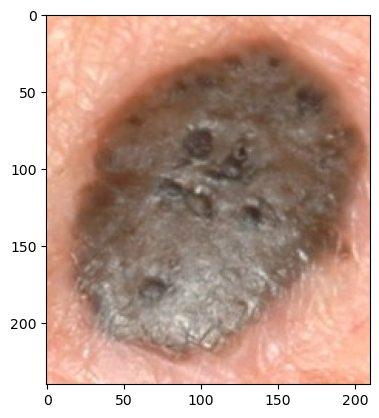

In [56]:
img = cv2.imread("Skin_Data/Non_Cancer/641.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img); img.shape

In [57]:
d = {"Cancer":1, "Non_Cancer":0}
df["encode_label"] = df["label"].map(d)

In [58]:
df.sample(5)

,img,label,encode_label
28,Skin_Data/Cancer/1789-02.JPG,Cancer,1
115,Skin_Data/Non_Cancer/133-1.JPG,Non_Cancer,0
105,Skin_Data/Non_Cancer/1151-01.JPG,Non_Cancer,0
112,Skin_Data/Non_Cancer/1272-2.JPG,Non_Cancer,0
178,Skin_Data/Non_Cancer/2045-02.JPG,Non_Cancer,0


In [59]:
x = []
for img in df["img"]:
    img=cv2.imread(img)
    img = cv2.resize(img,(170,170))
    img = img/255.0
    x.append(img)

In [60]:
x = np.array(x)

In [61]:
y = df["encode_label"]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
model=Sequential()
model.add(Input(shape=(170,170,3)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=30) 

Epoch 1/30
8/8 [==============================] - 2s 195ms/step - loss: 0.0717 - accuracy: 0.9870 - val_loss: 0.1820 - val_accuracy: 0.9310
Epoch 2/30
8/8 [==============================] - 1s 178ms/step - loss: 0.0507 - accuracy: 0.9870 - val_loss: 0.2312 - val_accuracy: 0.8966
Epoch 3/30
8/8 [==============================] - 1s 161ms/step - loss: 0.0300 - accuracy: 0.9913 - val_loss: 0.2647 - val_accuracy: 0.9138
Epoch 4/30
8/8 [==============================] - 1s 180ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.2025 - val_accuracy: 0.9483
Epoch 5/30
8/8 [==============================] - 1s 158ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.2041 - val_accuracy: 0.8966
Epoch 6/30
8/8 [==============================] - 1s 171ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 0.9138
Epoch 7/30
8/8 [==============================] - 1s 182ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.2100 - val_accuracy: 0.9483
Epoch 8/30
8/8 [====

In [68]:
model.save("skin_cancer_model.h5")

# modelling with transfer learning

In [ ]:
# VGGNET, ResNet50, Inceptionv3, Xception, MobileNetV2 --- transfer learning applications

In [1]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
data_dir = "Skin_Data"
img_width,img_height = 224,224

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=.20)
train_datagenerator = train_datagen.flow_from_directory(directory=data_dir, 
                                   target_size=(img_width,img_height), 
                                   class_mode="binary", 
                                   subset="training"
                                   )

test_datagen = ImageDataGenerator(rescale=1/255)
test_datagenerator = train_datagen.flow_from_directory(directory=data_dir, 
                                   target_size=(img_width,img_height), 
                                   class_mode="binary", 
                                   subset="validation")

base_model = VGG16(weights="imagenet", input_shape=(img_width,img_height,3), include_top=False)

model = Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False # base model not trained

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_datagenerator, epochs=15, validation_data=test_datagenerator)
    

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
58889256/58889256 [==============================] - 17s 0us/step
Epoch 1/15
8/8 [==============================] - 20s 2s/step - loss: 4.4224 - accuracy: 0.5043 - val_loss: 1.1107 - val_accuracy: 0.7143
Epoch 2/15
8/8 [==============================] - 18s 2s/step - loss: 1.3228 - accuracy: 0.6940 - val_loss: 0.6345 - val_accuracy: 0.5714
Epoch 3/15
8/8 [==============================] - 19s 3s/step - loss: 0.4589 - accuracy: 0.7629 - val_loss: 0.4394 - val_accuracy: 0.8393
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.3543 - accuracy: 0.8491 - val_loss: 0.3826 - val_accuracy: 0.8214
Epoch 5/15
8/8 [==============================] - 18s 2s/step - loss: 0.2951 - accuracy: 0.9009 - val_loss: 0.4096 - val_accuracy: 0.7857
Epoch 6/15
8/8 [==============================] - 18s 2s/step - loss: 0.2657 - accuracy: 0.8879 - val_loss: 0.3759 - val_accuracy: 0.8214
Epoch 7/15
8/8 [=========

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_7 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 40406849 (154.14 MB)
Trainable params: 25692161 (98.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

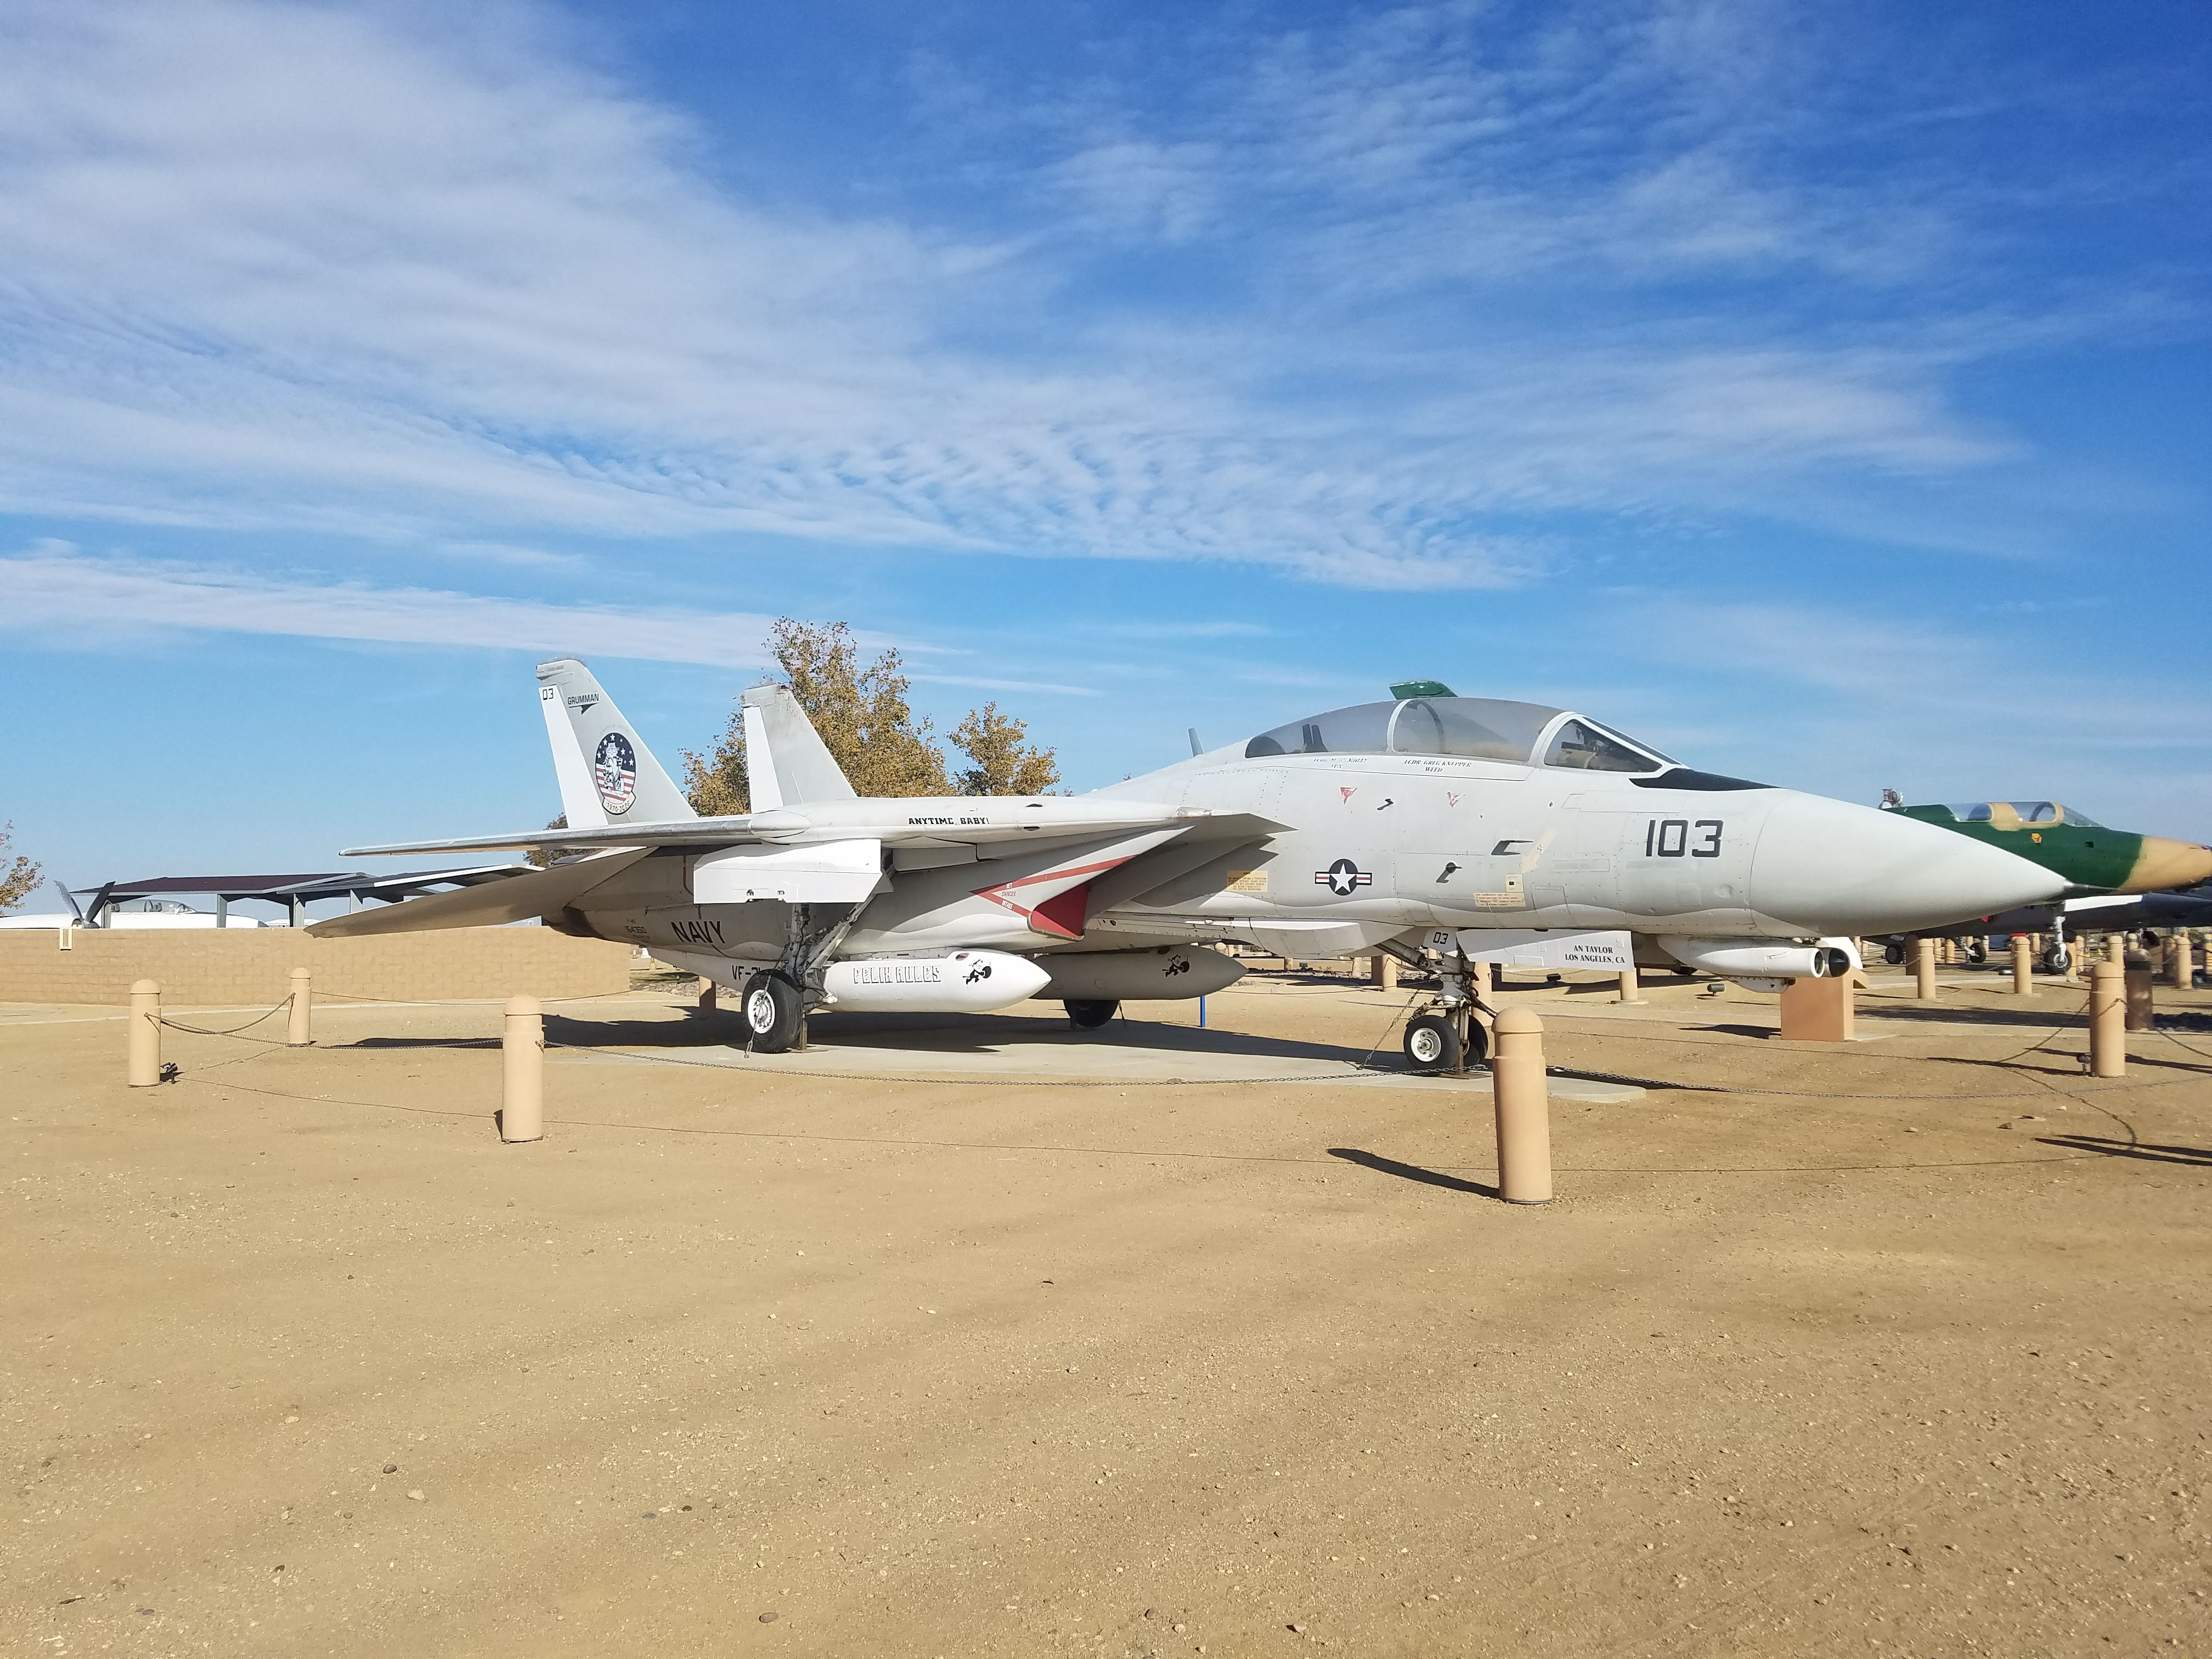

In [18]:
from IPython.display import Image
Image("plane.jpg")

In [14]:
img = image.load_img("plane.jpg", target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [15]:
model = ResNet50(weights="imagenet")

In [16]:
pred = model.predict(img)

1/1 [==============================] - 1s 1s/step


In [17]:
decode_predictions(pred, top=1)

35363/35363 [==============================] - 0s 1us/step


[[('n04552348', 'warplane', 0.7799497)]]